# Build Model

In [1]:
import pandas as pd
from top2vec import Top2Vec

In [2]:
CS = "cs"
MATH = "math"
STAT = "stat"
SUBJECT = STAT

In [3]:
data = pd.read_csv(f"dataset/arxiv_{SUBJECT}_emb.csv")
data

,title,submitted_date,tag_text,text
0,Entropy estimation of symbol sequences,2002-03-21,"Statistical Mechanics, Computation and Languag...",entropy estimation of symbol sequences. we dis...
1,Finding an Upper Limit in the Presence of Unkn...,2002-06-26,"Data Analysis, Statistics and Probability, App...",finding an upper limit in the presence of unkn...
2,Evolutionary design of photometric systems and...,2004-02-25,"Astrophysics, Neural and Evolutionary Computin...",evolutionary design of photometric systems and...
3,Stability and Diversity in Collective Adaptation,2004-11-22,"Adaptation and Self-Organizing Systems, Machin...",stability and diversity in collective adaptati...
4,"Bayesian alignment using hierarchical models, ...",2005-07-01,"Statistics Theory, Methodology","bayesian alignment using hierarchical models, ..."
...,...,...,...,...
28406,Pure interaction effects unseen by Random Forests,2025-08-01,"Machine Learning, Machine Learning",pure interaction effects unseen by random fore...
28407,Estimating Unbounded Density Ratios: Applicati...,2025-03-29,"Machine Learning, Machine Learning",estimating unbounded density ratios applicatio...
28408,Statistical and Geometrical properties of regu...,2025-03-11,"Machine Learning, Machine Learning, Functional...",statistical and geometrical properties of regu...
28409,Improving Coverage in Combined Prediction Sets...,2025-05-16,"Machine Learning, Artificial Intelligence, Mac...",improving coverage in combined prediction sets...


In [4]:
model = Top2Vec(
    documents=data['text'].tolist(),
    embedding_model='all-MiniLM-L6-v2', 
    contextual_top2vec=False,           
    ngram_vocab=False,                   
    speed='deep-learn'                  
)
original_count = model.get_num_topics()
print(f"number of topics found: {original_count}")

2025-11-19 17:20:59,163 - top2vec - INFO - Pre-processing documents for training
/home/nedo/Kuliah/TA/Program/.venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2025-11-19 17:21:04,727 - top2vec - INFO - Downloading all-MiniLM-L6-v2 model
2025-11-19 17:21:08,800 - top2vec - INFO - Creating joint document/word embedding
2025-11-19 17:21:51,431 - top2vec - INFO - Creating lower dimension embedding of documents
2025-11-19 17:22:06,435 - top2vec - INFO - Finding dense areas of documents
/home/nedo/Kuliah/TA/Program/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/nedo/Kuliah/TA/Program/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_fi

number of topics found: 187


In [5]:
target_topic_count = 100
model.hierarchical_topic_reduction(num_topics=target_topic_count)

print(f"Topics successfully reduced to: {target_topic_count}")

Reducing topics: 100%|██████████| 87/87 [00:03<00:00, 28.32it/s]


Topics successfully reduced to: 100


In [6]:
target_topic_count = 100
topic_words, word_scores, topic_nums = model.get_topics(target_topic_count, reduced=True)
topic_sizes, _ = model.get_topic_sizes(reduced=True)
for i in range(10):
    print(f"Reduced Topic #{topic_nums[i]} | Size: {topic_sizes[i]} docs")
    print(f"Keywords: {topic_words[i][0:10]}") 
    print("-" * 30)

Reduced Topic #0 | Size: 1359 docs
Keywords: ['learns' 'reinforcement' 'bandit' 'bandits' 'learnt' 'learning'
 'memorization' 'learningbased' 'optimality' 'optimal']
------------------------------
Reduced Topic #1 | Size: 630 docs
Keywords: ['deeplearning' 'softmax' 'backpropagation' 'neural' 'gradientbased'
 'learningbased' 'networks' 'cnns' 'tensorflow' 'imagenet']
------------------------------
Reduced Topic #2 | Size: 567 docs
Keywords: ['networks' 'adjacency' 'graphs' 'nodes' 'hypergraph' 'graphbased'
 'clusterings' 'subgraph' 'graphstructured' 'hypergraphs']
------------------------------
Reduced Topic #3 | Size: 552 docs
Keywords: ['mcmc' 'sampling' 'stochastically' 'samplingbased' 'stochastic'
 'randomization' 'markovian' 'markov' 'stochasticity' 'sampleefficient']
------------------------------
Reduced Topic #4 | Size: 539 docs
Keywords: ['minimizers' 'optimizer' 'optimizers' 'minimizes' 'minimizer'
 'optimization' 'gradientbased' 'minimization' 'optimizing' 'minimized']
-----

In [7]:
model.save(f"model_results/top2vec/{SUBJECT}_50")

## Visualization

In [8]:
loaded_model = Top2Vec.load(f"model_results/top2vec/{SUBJECT}_50")

In [9]:
original_topic = loaded_model.get_num_topics() 
topic_reduced = loaded_model.get_num_topics(reduced=True)

print(f"Total Topik Asli (Granular): {original_topic}")     
print(f"Total Topik Reduksi (Merged): {topic_reduced}") 

Total Topik Asli (Granular): 187
Total Topik Reduksi (Merged): 100


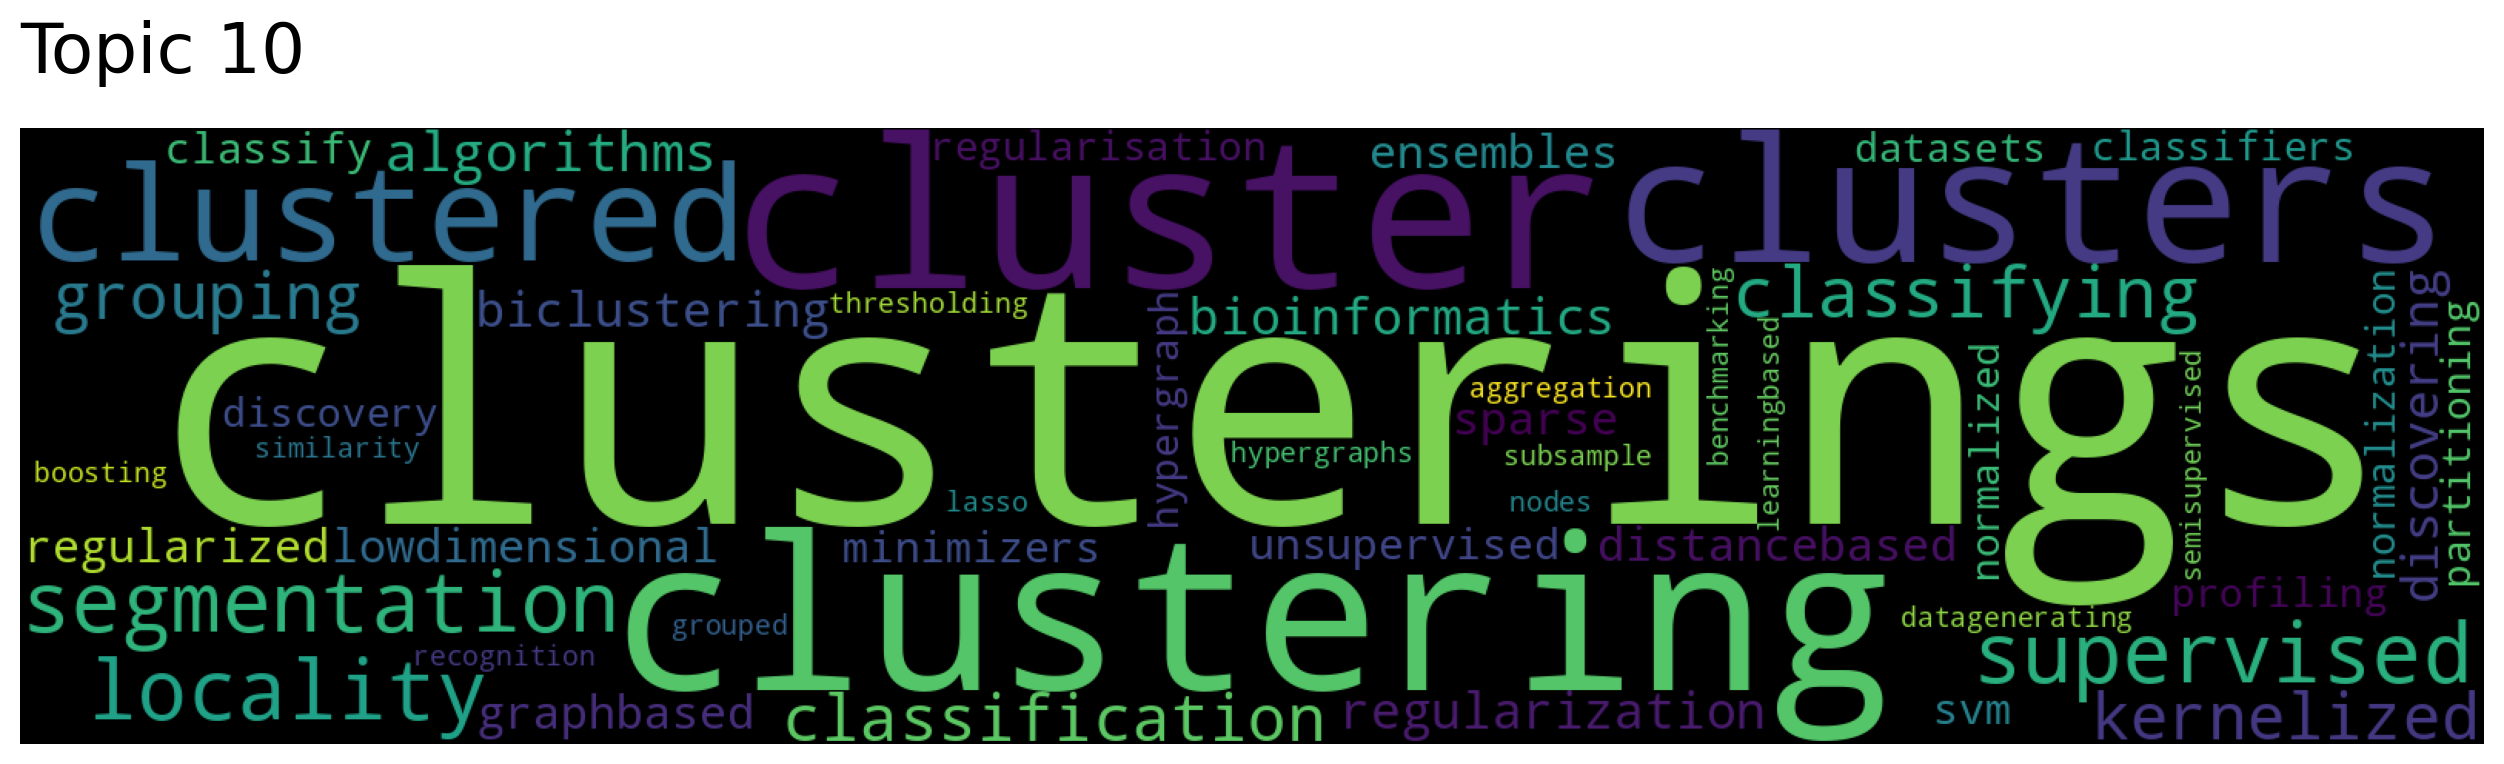

In [10]:
loaded_model.generate_topic_wordcloud(10, reduced=True)

In [11]:
data = pd.read_csv(f"dataset/arxiv_{SUBJECT}_emb.csv")

In [12]:
data['date'] = pd.to_datetime(data['submitted_date'])
data['topic_id'] = loaded_model.doc_top_reduced
topic_mapping = {}
topic_words, _, topic_nums = loaded_model.get_topics(reduced=True)
for t_num, t_words in zip(topic_nums, topic_words):
    topic_label = f"{t_num}: {'_'.join(t_words[:3])}"
    topic_mapping[t_num] = topic_label


data['topic_name'] = data['topic_id'].map(topic_mapping)

print(data[['date', 'topic_id', 'topic_name']].head())

        date  topic_id                                       topic_name
0 2002-03-21        26  26: probabilistic_distributional_stochastically
1 2002-06-26        43            43: estimations_estimating_estimators
2 2004-02-25        71              71: astronomy_astronomical_galaxies
3 2004-11-22         0                   0: learns_reinforcement_bandit
4 2005-07-01        33           33: bioinformatics_genomics_genomewide


In [13]:
total_docs_per_year = data.groupby(pd.Grouper(key='date', freq='YE')).size().reset_index(name='total_docs_year')
topics_over_time = data.groupby([pd.Grouper(key='date', freq='YE'), 'topic_name']).size().reset_index(name='count')
merged_data = pd.merge(topics_over_time, total_docs_per_year, on='date', how='left')
merged_data['proportion'] = merged_data['count'] / merged_data['total_docs_year']
top_5_topics = data['topic_name'].value_counts().head(5).index.tolist()
filtered_data = merged_data[merged_data['topic_name'].isin(top_5_topics)]

In [14]:
import plotly.express as px
fig = px.line(
    filtered_data, 
    x='date', 
    y='proportion', 
    color='topic_name',
    title='Perkembangan Topik Riset arXiv Seiring Waktu',
    labels={
        'proportion': 'Proporsi (0 - 1)', 
        'date': 'Waktu',
        'topic_name': 'Nama Topik'
    },
    markers=True 
)

fig.update_layout(
    hovermode="closest", 
    xaxis_title="Bulan/Tahun",
    yaxis_title="Frekuensi Topik"
)

fig.show()

# Coherence Score



In [15]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary

In [16]:
data = pd.read_csv(f"dataset/arxiv_{SUBJECT}_emb.csv")

In [17]:
loaded_model = Top2Vec.load(f"model_results/top2vec/{SUBJECT}_50")

In [18]:
tokenize_data = [text.split() for text in data['text'].tolist()]
dictionary = Dictionary(tokenize_data)

In [19]:
topic_words , word_scores , topic_nums = loaded_model.get_topics(loaded_model.get_num_topics(reduced=True), reduced=True)
top_n = 5
topic_words_sliced = topic_words[:, :top_n]

In [20]:
coherence_model = CoherenceModel(
    topics=topic_words_sliced.tolist(), 
    texts=tokenize_data,         
    dictionary=dictionary,
    coherence='c_v',             
    processes=1
)
coherence_score = coherence_model.get_coherence()
print(f"Coherence score : {coherence_score}")

Coherence score : 0.5153494215495329
